In [45]:
import pandas as pd
import numpy as np

from transformers import BartModel

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# Loading BART Model

In [8]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

# Importing Intention and Transcripts

In [10]:
df_intention = pd.read_excel('../../data/intention_calls_ee.xlsx', sheet_name='intention1')
df_intention

,ID,Intention Call Categories,Definition or Description
0,1,Billing and Payments,"Questions regarding the latest bill, payment i..."
1,2,Service Requests and Appointments,"Scheduling maintenance or repair, connection r..."
2,3,Outages and Emergencies,"Reporting power outages, electrical emergencie..."
3,4,Account Management,"Updating personal information, closing/opening..."
4,5,Technical Support and Troubleshooting,"Help with understanding meter readings, assist..."
5,6,Complaints and Grievances,"Lodging a complaint regarding service, billing..."
6,7,Inquiries and General Information,"Information about services and products, guida..."
7,8,Renewable Energy and Sustainability Programs,"Information on renewable energy options, enrol..."
8,9,Contractor and Partner Communications,"Communication with third-party contractors, ve..."
9,10,Regulatory Compliance and Legal Inquiries,"Information regarding regulatory compliances, ..."


In [11]:
df_transcripts = pd.read_csv('../../data/transcripts_2022_v2.csv')
df_transcripts

,call_transcript,mood,agent_number,intention,resolution,Date
0,"Agent 1: Good morning, thank you for calling E...",angry,1,Feedback and Suggestions,resolved,2022-01-01 00:00:00.000000000
1,"Agent 2: Thank you for calling ElectricVolt, m...",happy,2,Technical Support and Troubleshooting,resolved,2022-01-01 08:44:41.081081081
2,"Agent 3: Thank you for calling ElectricVolt, m...",happy,3,Account Management,resolved,2022-01-01 17:29:22.162162162
3,"Agent 2: Thank you for calling ElectricVolt, m...",happy,2,Outages and Emergencies,resolved,2022-01-02 02:14:03.243243243
4,"Agent 1: Thank you for calling ElectricVolt, m...",angry,1,Billing and Payments,resolved,2022-01-02 10:58:44.324324324
...,...,...,...,...,...,...
995,"Agent 2: Good morning, thank you for calling E...",angry,2,Complaints and Grievances,resolved,2022-12-29 13:01:15.675675676
996,Agent 2: Thank you for calling ElectricVolt. M...,neutral,2,Feedback and Suggestions,resolved,2022-12-29 21:45:56.756756756
997,Agent 3: Thank you for calling ElectricVolt. M...,neutral,3,Inquiries and General Information,resolved,2022-12-30 06:30:37.837837840
998,[Phone rings]\n\nAgent 3: Thank you for callin...,neutral,3,Service Requests and Appointments,unresolved,2022-12-30 15:15:18.918918920


# Intention Classification Process

In [49]:
candidate_labels = list(df_intention['Intention Call Categories'])

transcript_number = 1
total_rows = 20
intention_list = []

#iterate over columns call_transcript and intention in df_transcripts
for index, row in df_transcripts.iloc[0:total_rows].iterrows():
    print("Transcript number: ", transcript_number)
    transcript = row['call_transcript']
    intention = row['intention'] #real intention
    output = classifier(transcript, candidate_labels)
    max_score_index = output['scores'].index(max(output['scores']))
    max_label = output['labels'][max_score_index]

    intention_list.append(max_label)

    transcript_number += 1
    

Transcript number:  1
Transcript number:  2
Transcript number:  3
Transcript number:  4
Transcript number:  5
Transcript number:  6
Transcript number:  7
Transcript number:  8
Transcript number:  9
Transcript number:  10
Transcript number:  11
Transcript number:  12


KeyboardInterrupt: 

## Model Metrics

In [43]:
l_intention_predict = intention_list
l_intention_test = df_transcripts['intention'].iloc[0:total_rows].tolist()

## Accuracy

In [46]:
accuracy = accuracy_score(l_intention_test, l_intention_predict)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.60


## Confusion Matrix

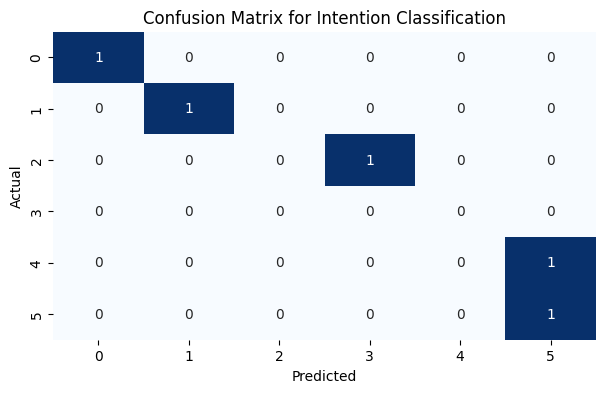

In [47]:
#confusion matrix
cm = confusion_matrix(l_intention_test, l_intention_predict)

#plot confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Intention Classification')
plt.show()